#  **Introduction**
Financial loan services are crucial to supporting both individuals and businesses, ranging from personal banking needs to institutional financing. However, one of the biggest challenges in this sector is loan default, where borrowers fail to repay their loans on time. Loan defaults not only reduce profitability for financial institutions but also increase the risk exposure in credit portfolios.

To mitigate this, many institutions are increasingly using machine learning to proactively predict the likelihood of default. These predictive models help identify high-risk borrowers early in the lending process, enabling lenders to make informed decisions and implement targeted intervention strategies. This project aims to build and evaluate several machine learning models that can effectively predict the likelihood of a loan default using historical data.

#  **About the dataset**
This dataset, originally released as part of Coursera’s Loan Default Prediction Challenge, provides a real-world platform to develop and assess models for default prediction. It consists of:

255,347 rows (individual loan records)

18 columns (features that describe the borrower's profile and loan characteristics)

These features include variables such as loan amount, interest rate, borrower characteristics, and financial indicators. The target variable is a binary indicator of whether a borrower defaulted on the loan (1 for default, 0 for non-default).

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
#Loading the data
data = pd.read_csv("Loan_default.csv")
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


#  **DATA PREPROCESSING**

**CHECKING THE DATA**

In [3]:
# Check the shape of the dataset
data.shape

(255347, 18)

In [4]:
#Check for missimg values from the features
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [6]:
#Removing the unnecessary load_id as it is an identifier column
data.drop('LoanID', axis=1, inplace=True)
#Making a copy of the data
df = data.copy()

**Checking Categorical Features**

As shown above some features are categorical feature which of dtype object. 
We must map them to integer type to be able to train our machine learning models. Since we have identified all non-numeric (object) features we will:
1. Display the number of unique categories for each feature using the `tabulate` library.
2. Use `LabelEncoder` from `sklearn` to convert these into integer labels.

Label encoding is suitable here because our machine learning models (e.g.,Random Forest, Gradient Boosting, and DT) can handle ordinal relationships, even though these features are not truly ordinal.

In [7]:
from tabulate import tabulate
object_features = ['HasCoSigner', 'LoanPurpose', 'HasDependents', 'HasMortgage', 
                   'MaritalStatus', 'EmploymentType', 'Education']
rows = []
for feature in object_features:
    categories = data[feature].value_counts().index.tolist()
    rows.append([feature, len(categories), categories])

print(tabulate(rows, headers=["Feature", "#Categories", "Categories"], tablefmt="grid"))

+----------------+---------------+-----------------------------------------------------------+
| Feature        |   #Categories | Categories                                                |
+================+===============+===========================================================+
| HasCoSigner    |             2 | ['Yes', 'No']                                             |
+----------------+---------------+-----------------------------------------------------------+
| LoanPurpose    |             5 | ['Business', 'Home', 'Education', 'Other', 'Auto']        |
+----------------+---------------+-----------------------------------------------------------+
| HasDependents  |             2 | ['Yes', 'No']                                             |
+----------------+---------------+-----------------------------------------------------------+
| HasMortgage    |             2 | ['Yes', 'No']                                             |
+----------------+---------------+----------------

## Checking the distribution of the target variable

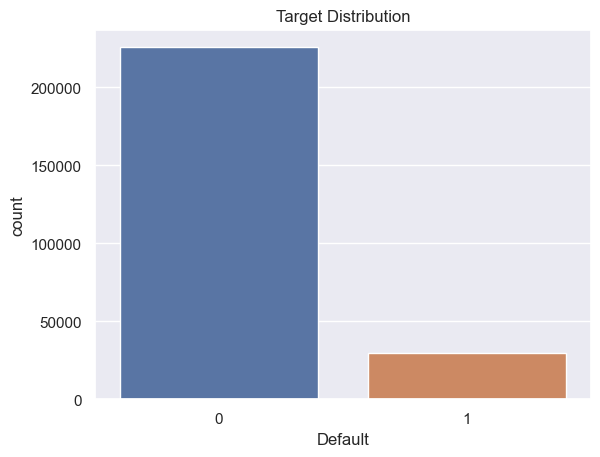

In [15]:
sns.countplot(data=data, x='Default')
plt.title("Target Distribution")
plt.show()

We can see from the distribtuion that we are ealing with an imbalanced dataset.

# **LABEL ENCODER**

In [8]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
objectColumns = ['HasCoSigner','LoanPurpose','HasDependents', 'HasMortgage','MaritalStatus', 'EmploymentType', 'Education']
for col in objectColumns:
    data[col] = le.fit_transform(data[col])

In [9]:
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,1.494421,1.500096,0.999918,0.500014,0.500268,2.000501,0.500108,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,1.118826,1.117358,0.816051,0.500001,0.500001,1.412723,0.500001,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,3.000000,3.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [10]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


#   **DATA EXPLORATION**

In [11]:
#Checking corelation
corr = data.corrwith(data['Default'])
print(corr.sort_values(ascending=False))

Default           1.000000
InterestRate      0.131273
LoanAmount        0.086659
EmploymentType    0.041010
NumCreditLines    0.028330
DTIRatio          0.019236
LoanTerm          0.000545
MaritalStatus    -0.007902
LoanPurpose      -0.010096
Education        -0.022835
HasMortgage      -0.022856
CreditScore      -0.034166
HasDependents    -0.034678
HasCoSigner      -0.039109
MonthsEmployed   -0.097374
Income           -0.099119
Age              -0.167783
dtype: float64


### Correlation Matrix

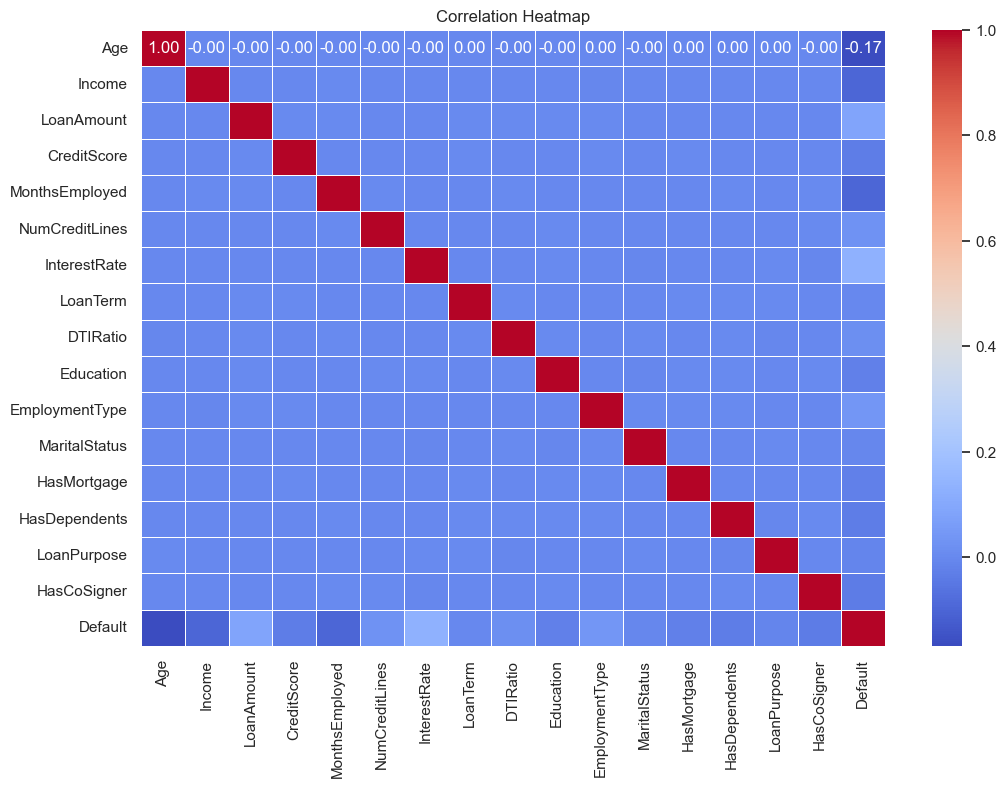

In [12]:
#  Compute correlation matrix and visualize it
corr_matrix = data.corr()

#  Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


This heatmap shows the Pearson correlation between features and with the target (`Default`).  
Highly correlated features can lead to multicollinearity in some models, while features weakly correlated with the target may be less informative.

**Feature correlations with `Default`:**  
<br>

- **`InterestRate`** (+0.131): Borrowers with higher interest rates are **slightly more likely** to default.  
- **`LoanAmount`** (+0.087): Larger loans are **weakly associated** with default.  
- **`EmploymentType`** (+0.041): A weak positive association, possibly due to encoding of 'Unemployed'.  
- **`NumCreditLines`** (+0.028): Slight positive correlation; more credit lines may indicate financial overextension.  
- **`DTIRatio`** (+0.019): Higher debt-to-income ratio shows **minimal** correlation with default.  
- **`LoanTerm`** (+0.001): Almost no relationship with default.  
- **`MaritalStatus`** (-0.008): Very weak negative correlation.  
- **`LoanPurpose`** (-0.010): No meaningful relationship.  
- **`Education`** (-0.023): Higher education may **slightly reduce** default risk.  
- **`HasMortgage`** (-0.023): Minor negative association with default.  
- **`CreditScore`** (-0.034): Slightly lower credit scores correlate with higher default risk.  
- **`HasDependents`** (-0.035): Weak negative relationship.  
- **`HasCoSigner`** (-0.039): Slightly lowers default risk, possibly due to shared responsibility.  
- **`MonthsEmployed`** (-0.097): Longer employment duration **reduces** risk of default.  
- **`Income`** (-0.099): Higher income is **moderately protective** against default.  
- **`Age`** (-0.168): Older individuals are **less likely** to default; the strongest negative correlation observed.  


# **MODEL BUILDING**

**IMPORTING MACHINE LEARNING LIBRARIES, TRAIN TEST SPLIT, AND PERFOMANCE METRICS**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#We make use of the copy of the data we created to rightly encode the data in one hot since the caegorical variables are not ordinal
df_encoded = pd.get_dummies(df, drop_first= False).astype(float)

In [ ]:
X = df_encoded.drop(['Default'], axis = 1)
y = df_encoded['Default']

In [ ]:
X.shape

In [21]:
#Split the data into training and test sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

## Training the Models

We train XGBoost, Logistic regresssion and GassianNB models below and determine their performance

In [56]:
#Models to be trained
models = [
    XGBClassifier(),
    LogisticRegression(max_iter=1000),
    GaussianNB(var_smoothing=1e-9),
]

In [36]:
#Training the models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score =  accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    recall =  recall_score(y_test, y_pred)
    F1score = f1_score(y_test, y_pred)
    model_name = model.__class__.__name__
    print(f'{model_name} - Accuracy: {score:.3f}, Recall: {recall:.2f}')

XGBClassifier - Accuracy: 0.886, Recall: 0.08
LogisticRegression - Accuracy: 0.884, Recall: 0.01
GaussianNB - Accuracy: 0.884, Recall: 0.01


- All models show **high accuracy (>88%)** but **very low recall (<0.09)** for the default class.
- This indicates poor predictive performance for the minority class (defaults).
- As ealier noted in the previous section, the dataset is not balanced.
- **Class imbalance** is severely affecting the models since the models tend to predict the majority class (non-default) most of the time.


This suggests that the models are not effectively identifying defaulting clients, **which defeats the purpose of the prediction.**

To improve model performance on the minority class, I will:


- Use **Random Over Sampling** to curb class imbalance problems by randomly oversampling minority class.

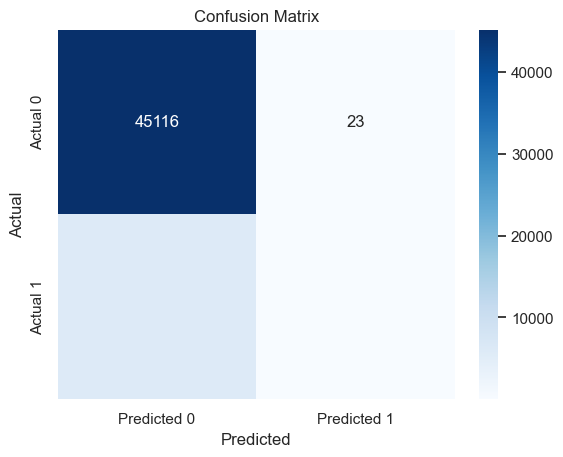

In [44]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [29]:
#Oversampling randomly to balance the dataset
ros = RandomOverSampler() 
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
#confirm the shape of the resampled data
print(f'Shape of the resampled data:\n X_train: {X_resampled.shape} \n y_train: {y_resampled.shape}')

Shape of the resampled data:
 X_train: (361110, 31) 
 y_train: (361110,)


The resampled data now has 361110 entries. We confirm that the class is balanced below

In [29]:
y_resampled.value_counts()

Default
0.0    191839
1.0    191839
Name: count, dtype: int64

We proceed to train the models since the dataset is now balanced

In [50]:
#Training the models
for model in models:
    model.fit(X_resampled, y_resampled)
    y_predic = model.predict(X_test)
    score =  accuracy_score(y_test,y_predic)
    recall =  recall_score(y_test, y_predic)
    model_name = model.__class__.__name__
    print(f'{model_name} - Accuracy: {score:.3f}, Recall: {recall:.2f}')
    if isinstance(model, XGBClassifier):
        importances = model.feature_importances_

XGBClassifier - Accuracy: 0.718, Recall: 0.62
LogisticRegression - Accuracy: 0.666, Recall: 0.67
GaussianNB - Accuracy: 0.660, Recall: 0.70


After applying Random Over Sampler, we observe increase in Recall and decrease in Accuracy for all models.

Nevertheless, we now detect more actual defaulters (class 1), unlike before where the model predicted almost none.

**However**
- We still have insufficient separability in features since both Recall and Accuracy are still not optimal.

**Why Recall Matters More Than Accuracy Here**

_Accuracy_ measures overall correctness but doesn't tell us how well the model is doing on each class, especially the minority.
Although the accuracy was high, this was misleading. The models almost always predicted 'no default', hence failing to identify true defaults.

- Classes are imbalanced

- False negatives are costly

In loan default prediction:

A false negative (predicting no default when the person defaults) is more dangerous than a false positive.
Higher recall means the models are identifying defaults.

Therefore, improvements in the Recall indicates that the model has become better at identifying true defaults.

In [53]:
cm = confusion_matrix(y_test, y_predic)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"],
                        columns=["Predicted 0", "Predicted 1"])
print(cm_df)

          Predicted 0  Predicted 1
Actual 0        29508        15631
Actual 1         1756         4175


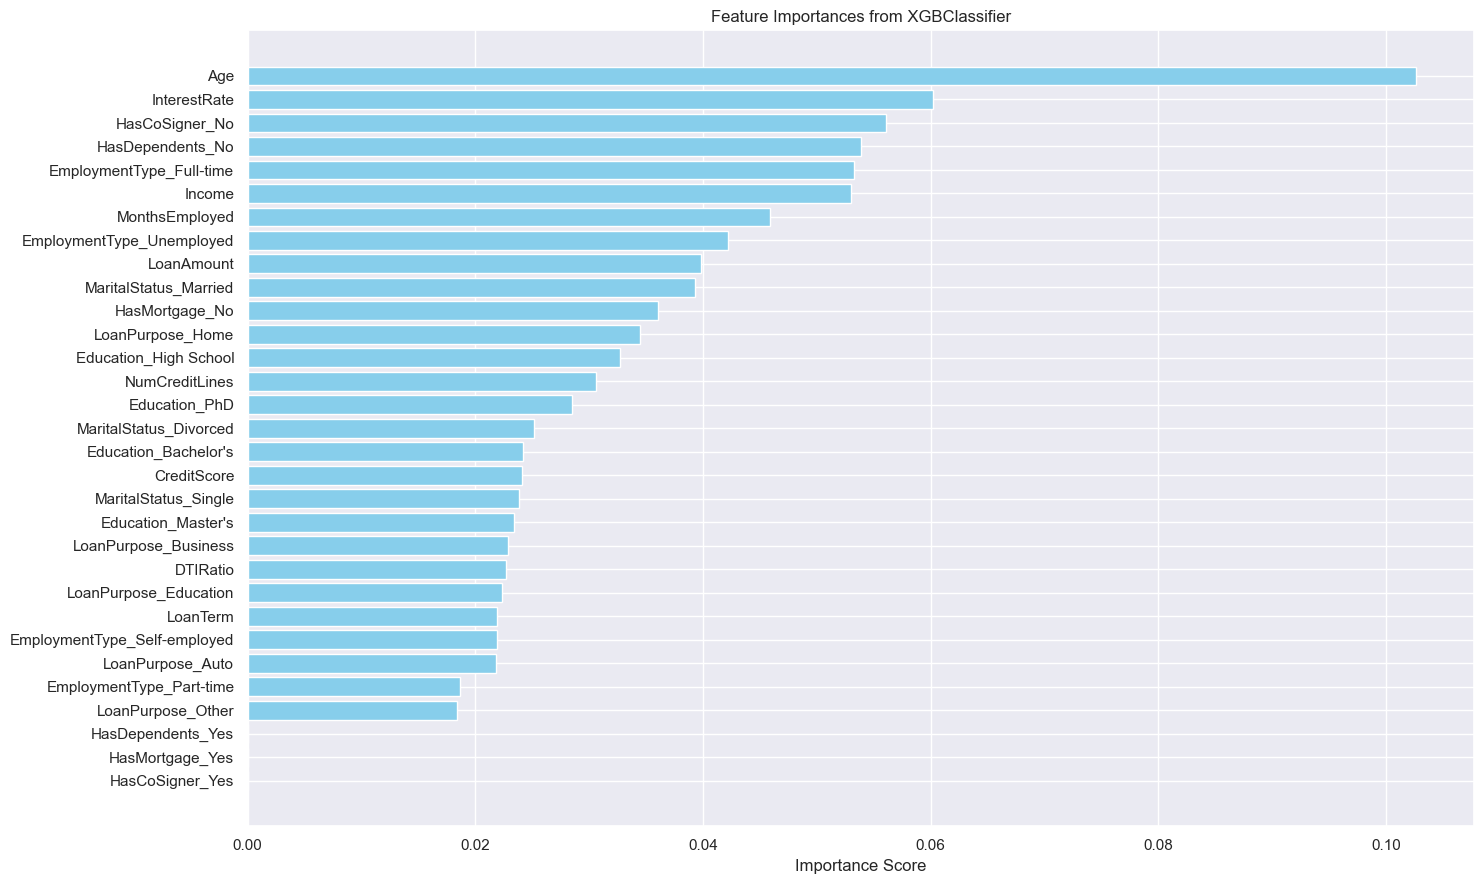

In [57]:
# Create DataFrame for easy sorting and labeling
feature_imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(15, 9))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importances from XGBClassifier')
plt.gca().invert_yaxis()  # Highest importance at top
plt.tight_layout()
plt.show()

**Feature importance using RandoForest Classifier**

-  The bar chart above shows the feature importances of all the feaures. According to the random forest; Age is the most informative while HasCosigner_yes is the least.
-  Feature importance does **not** tell us whether there is a positive relationship between the feuture and the target
i.e It does not tell us that higher age is associated with defaut rather it just tell us that age was more informative.
- The results of the feature importance is consistent with the correlations analysed earlier
- *The four best predictors of Default are Age, Interest Rates, Employmenrt type, and Income.*